In [1]:
#Solution using sklearn
#See guide on DataCamp: https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
#See guide on towardsdatascience: https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75

#Import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [2]:
#Import data

#Matt path
#loan = pd.read_csv('C:\\Users\\mattd\\Desktop\\KNN\\small_loan.csv')
#loan = pd.read_csv('C:\\Users\\mattd\\Desktop\\KNN\\small_loan_10k.csv')

#Ian path
#loan = pd.read_csv('~/Documents/MBA/MachineLearning/small_loan_50k.csv')

#Test big loan
loan = pd.read_csv('C:\\Users\\mattd\\Desktop\\KNN\\loan.csv')


C:\Users\mattd\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Shape
print(loan.shape)

(2260668, 145)


In [4]:
#Clean data
#change loan to specific column
loan_s = loan[['annual_inc', 'loan_amnt', 'open_acc', 'purpose', 'dti', 'pub_rec', 'home_ownership', 'inq_last_6mths', 'grade']]

#Delete annual_inc = 0
loan_s = loan_s[loan_s.annual_inc != 0]

#Delete annual_inc > 500000
loan_s = loan_s[loan_s.annual_inc <= 500000]

#Delete open acc > 60
loan_s = loan_s[loan_s.open_acc <= 60]

#Delete dti > 60
loan_s = loan_s[loan_s.dti <= 60]

#Delete pub rec > 5
loan_s = loan_s[loan_s.pub_rec <= 5]

#Delete inq_last_6mths > 5
loan_s = loan_s[loan_s.inq_last_6mths <= 5]

#Replace Home Ownership values ANY and NONE with OTHER
loan_s = loan_s.replace(to_replace = ["ANY","NONE"], value = "OTHER")

#Replace Purpose values house, car, vacation, renewable energy, wedding, and educational with other
loan_s = loan_s.replace(to_replace = ["house","car","vacation","renewable_energy","wedding","educational"], value = "other")

#Drop NAs
loan_s.dropna(inplace = True)

In [5]:
#Explore data

#sort_by_annual_inc = loan_s.sort_values('annual_inc',ascending=False)
#sort_by_dti = loan_s.sort_values('dti',ascending=False)
#sort_by_loan_amnt = loan_s.sort_values('loan_amnt',ascending=False)
#sort_by_open_acc = loan_s.sort_values('open_acc',ascending=False)
#sort_by_pub_rec = loan_s.sort_values('pub_rec',ascending=False)
#sort_by_inq = loan_s.sort_values('inq_last_6mths',ascending=False)

#print("Annual Inc", sort_by_annual_inc.head(30))
#print("DTI",sort_by_dti.head(30))
#print("Loan Amnt",sort_by_loan_amnt.head(30))
#print("Open Acc",sort_by_open_acc.head(30))
#print("Pub Rec",sort_by_pub_rec.head(30))
#print("Inq",sort_by_inq.head(30))

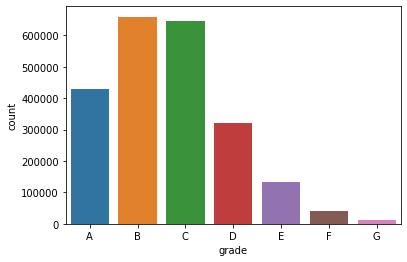

In [6]:
#Grade count plot

p = sns.countplot(data=loan_s[['grade']], x = 'grade', order = ["A","B","C","D","E","F","G"])


[Text(0, 0, 'debt_consolidation'),
 Text(0, 0, 'credit_card'),
 Text(0, 0, 'other'),
 Text(0, 0, 'home_improvement'),
 Text(0, 0, 'small_business'),
 Text(0, 0, 'major_purchase'),
 Text(0, 0, 'medical'),
 Text(0, 0, 'moving')]

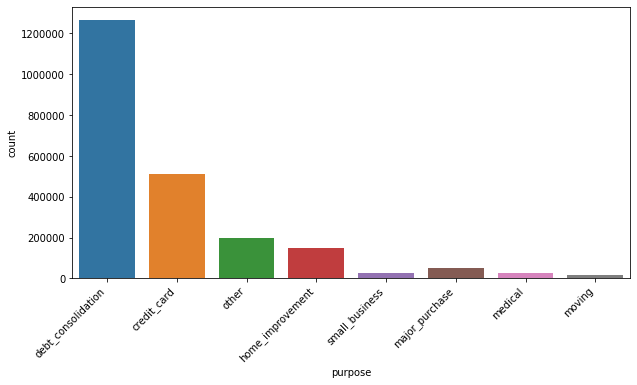

In [7]:
#Purpose count plot

plt.figure(figsize=(10,5))
p = sns.countplot(data=loan_s[['purpose']], x = 'purpose')
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')

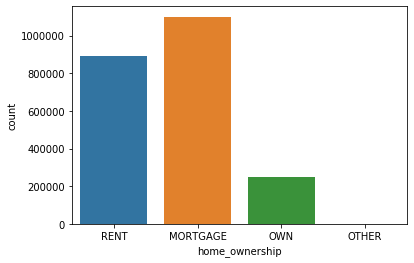

In [8]:
#Home ownership count plot

p = sns.countplot(data=loan_s[['home_ownership']], x = 'home_ownership')

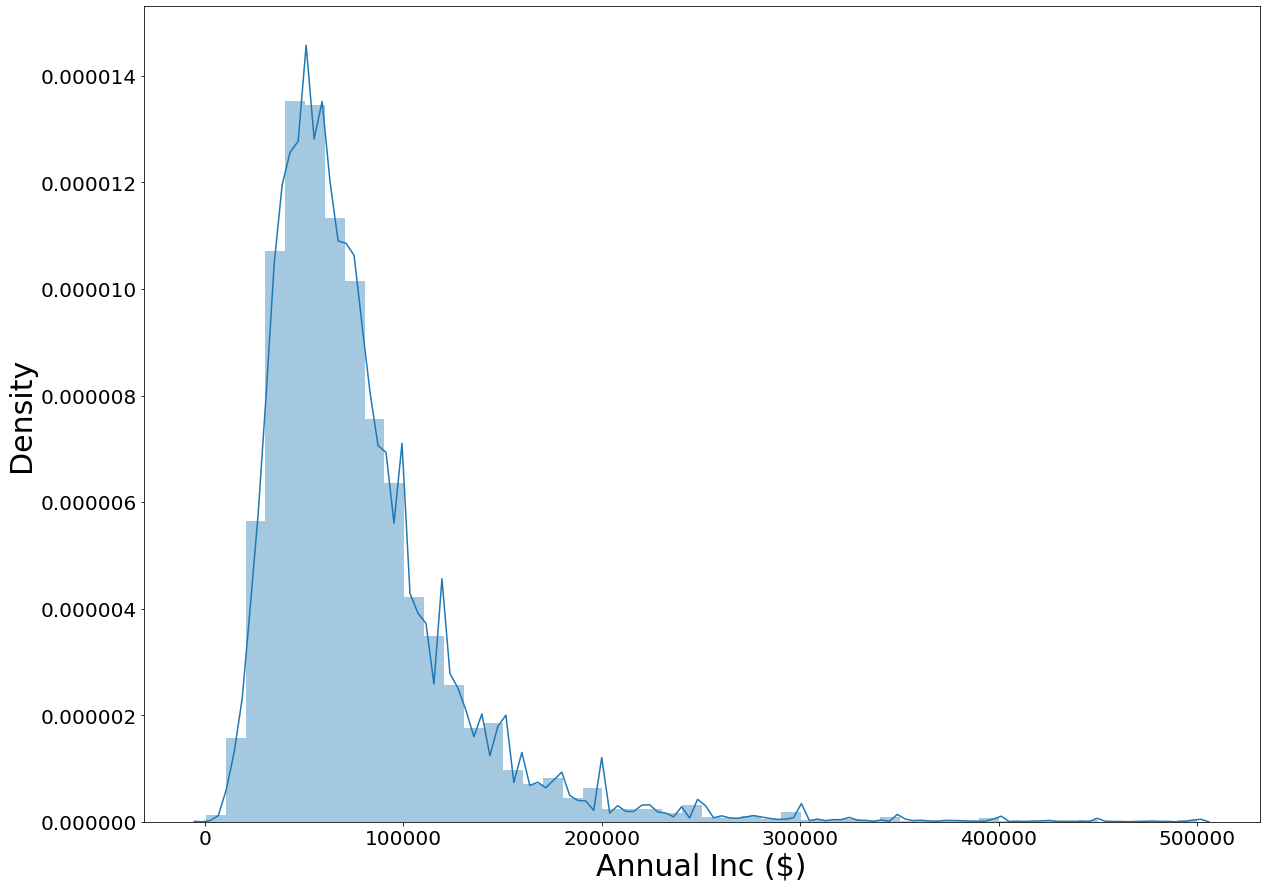

In [9]:
#Histogram from annual inc

plt.subplots(figsize = (20,15))
annual_inc_plot = sns.distplot(loan_s[['annual_inc']])
annual_inc_plot.set_xlabel("Annual Inc ($)",fontsize=30)
annual_inc_plot.set_ylabel("Density",fontsize=30)
annual_inc_plot.tick_params(labelsize=20)

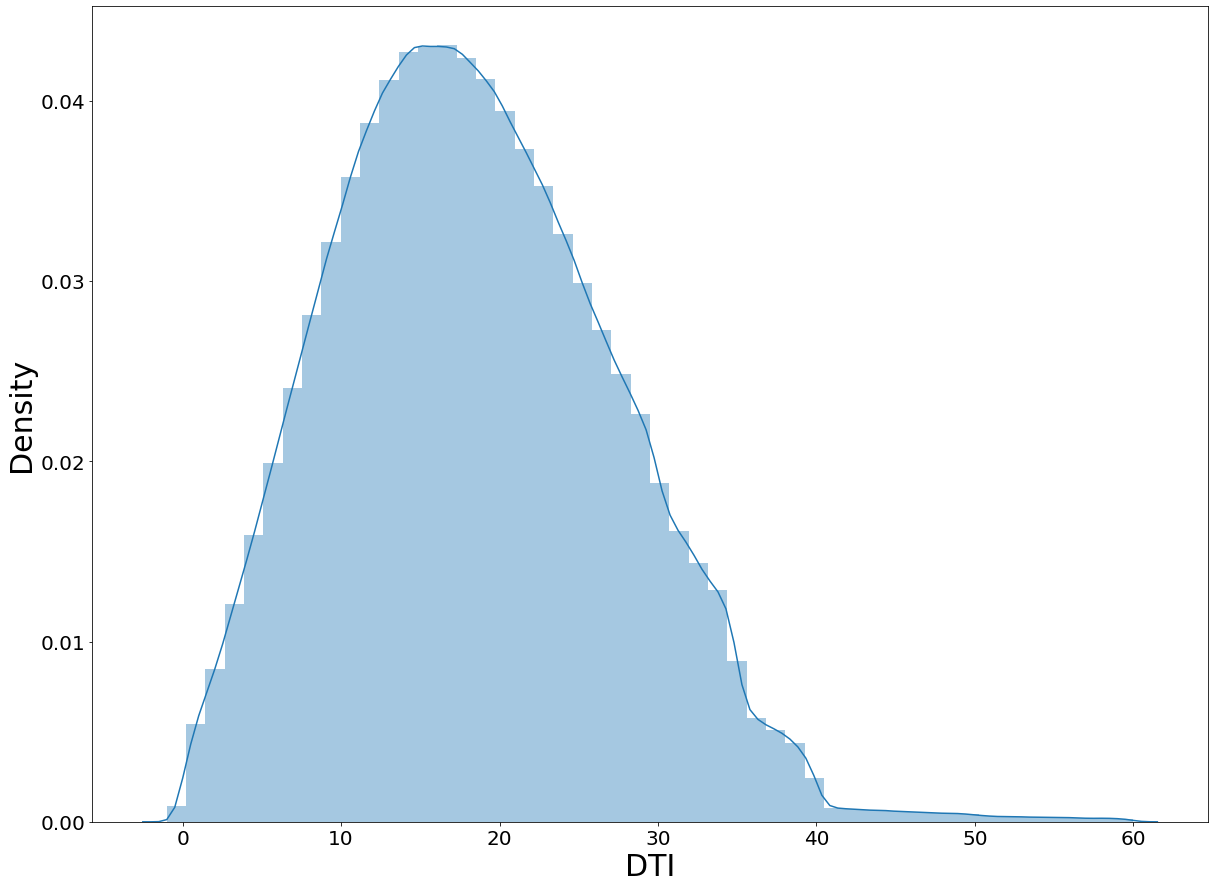

In [10]:
#Histogram from DTI
plt.subplots(figsize = (20,15))
annual_inc_plot = sns.distplot(loan_s[['dti']])
annual_inc_plot.set_xlabel("DTI",fontsize=30)
annual_inc_plot.set_ylabel("Density",fontsize=30)
annual_inc_plot.tick_params(labelsize=20)

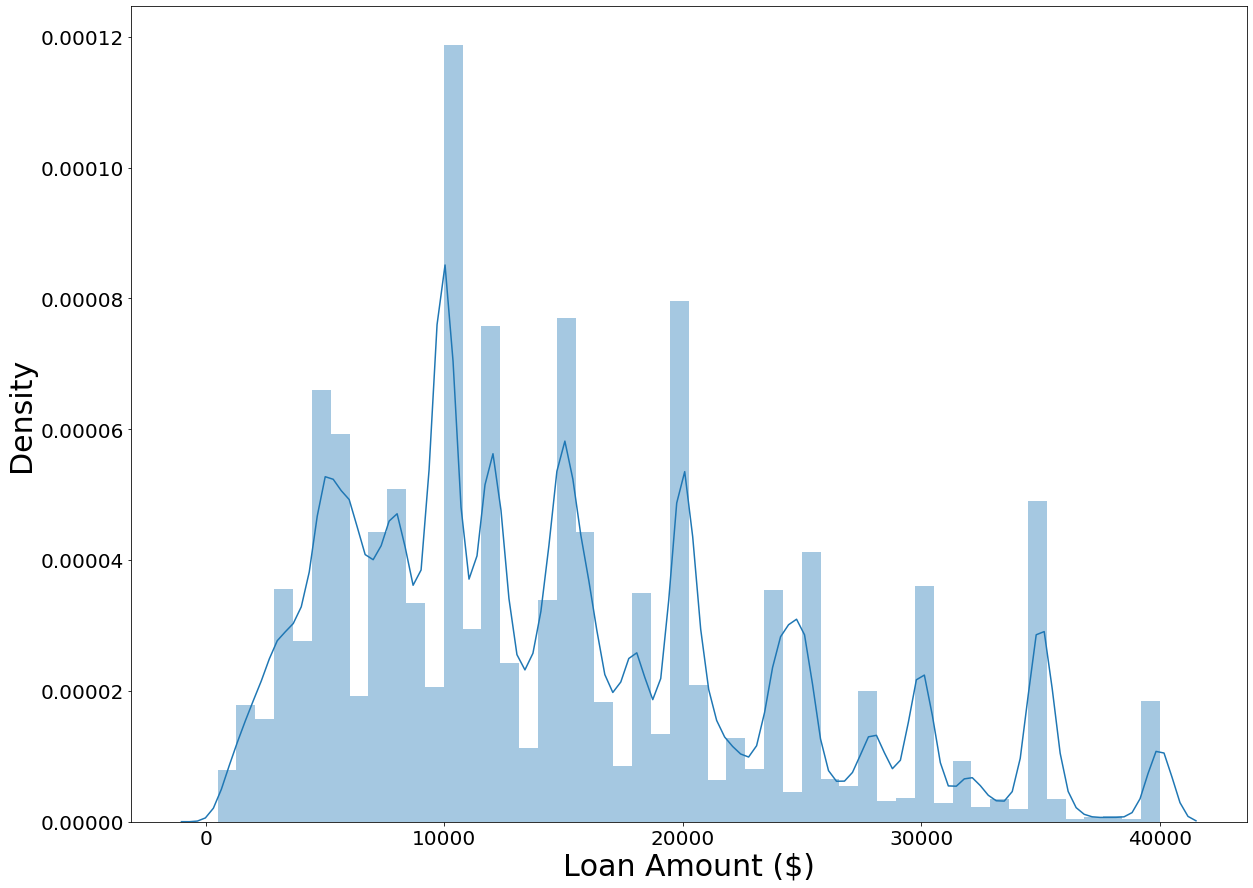

In [11]:
#Histogram from Loam Amnt
plt.subplots(figsize = (20,15))
annual_inc_plot = sns.distplot(loan_s[['loan_amnt']])
annual_inc_plot.set_xlabel("Loan Amount ($)",fontsize=30)
annual_inc_plot.set_ylabel("Density",fontsize=30)
annual_inc_plot.tick_params(labelsize=20)

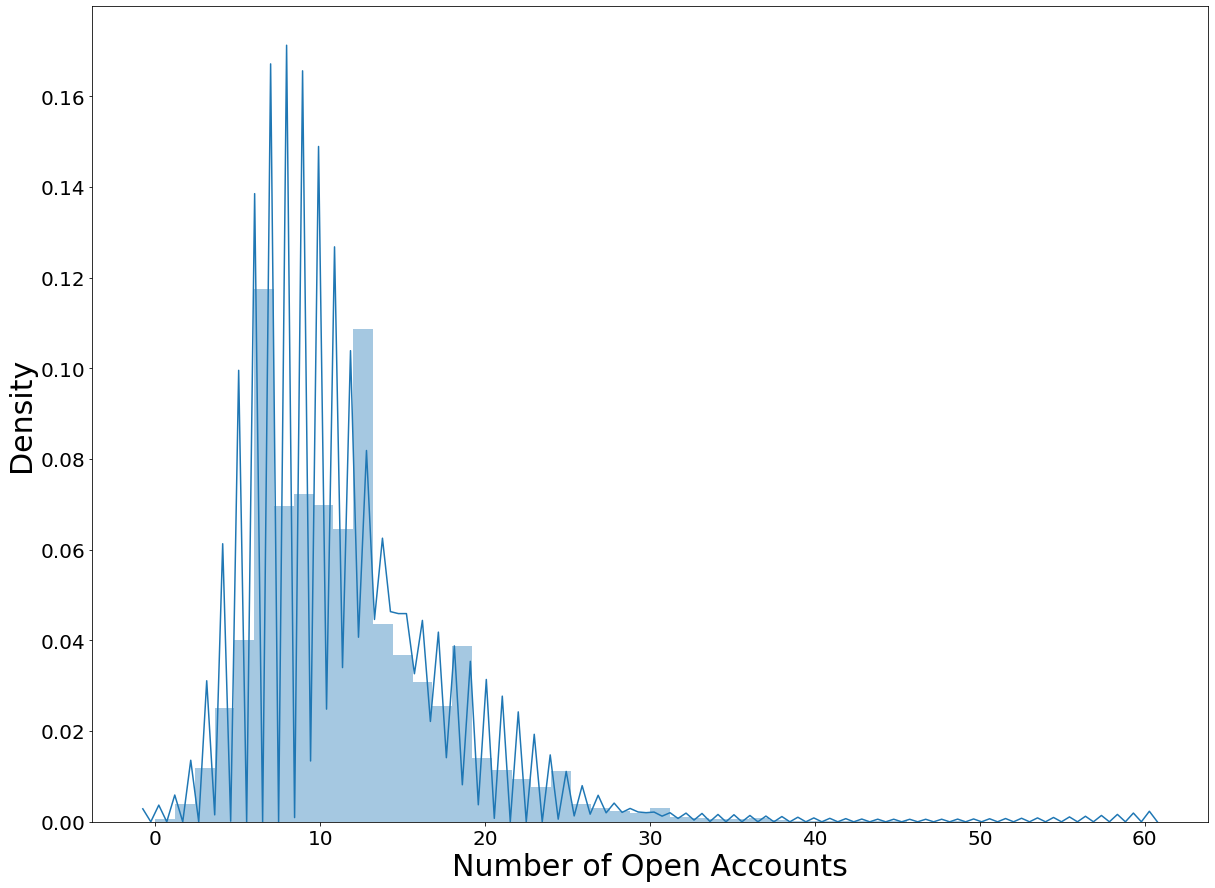

In [12]:
#Histogram from Oppen Acc
plt.subplots(figsize = (20,15))
annual_inc_plot = sns.distplot(loan_s[['open_acc']])
annual_inc_plot.set_xlabel("Number of Open Accounts",fontsize=30)
annual_inc_plot.set_ylabel("Density",fontsize=30)
annual_inc_plot.tick_params(labelsize=20)

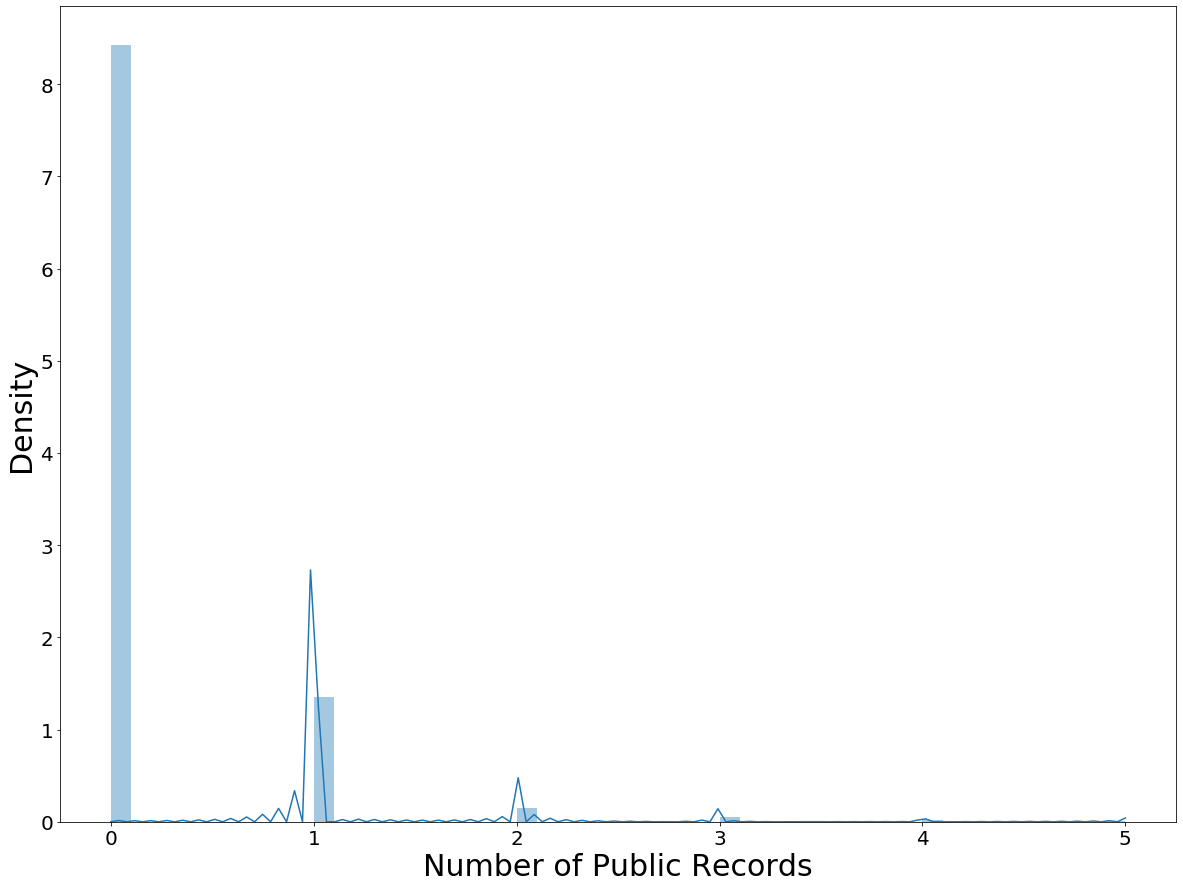

In [13]:
#Histogram from Pub Rec
plt.subplots(figsize = (20,15))
annual_inc_plot = sns.distplot(loan_s[['pub_rec']])
annual_inc_plot.set_xlabel("Number of Public Records",fontsize=30)
annual_inc_plot.set_ylabel("Density",fontsize=30)
annual_inc_plot.tick_params(labelsize=20)

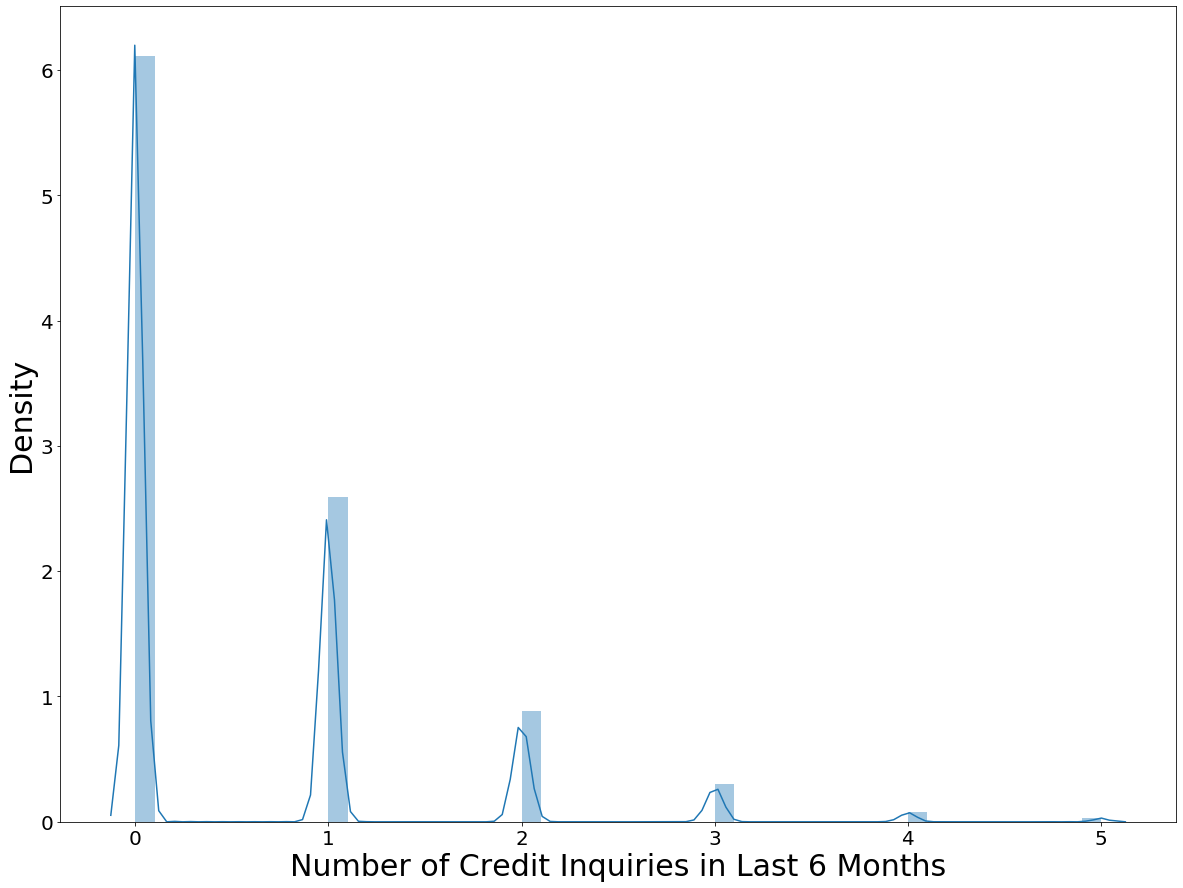

In [14]:
#Histogram from Credit Inquiries in Last 6 Months
plt.subplots(figsize = (20,15))
annual_inc_plot = sns.distplot(loan_s[['inq_last_6mths']])
annual_inc_plot.set_xlabel("Number of Credit Inquiries in Last 6 Months",fontsize=30)
annual_inc_plot.set_ylabel("Density",fontsize=30)
annual_inc_plot.tick_params(labelsize=20)

In [15]:
#defining the data sets
y = loan_s['grade']
loan_s = loan_s.drop(columns=['grade'])


In [16]:
#dummy variables for purpose, home ownership, and grade
#dummygrade = pd.get_dummies(loan['grade'])
dummypurp = pd.get_dummies(loan_s['purpose'])
dummyhome = pd.get_dummies(loan_s['home_ownership'])
#Concat 
#loan_s = pd.concat([loan_s, dummypurp, dummyhome, dummygrade], axis=1)
loan_s = pd.concat([loan_s, dummypurp, dummyhome], axis=1)

#drop
#loan_s = loan_s.drop(['grade','purpose','home_ownership'], axis=1)
loan_s = loan_s.drop(['purpose','home_ownership'], axis=1)

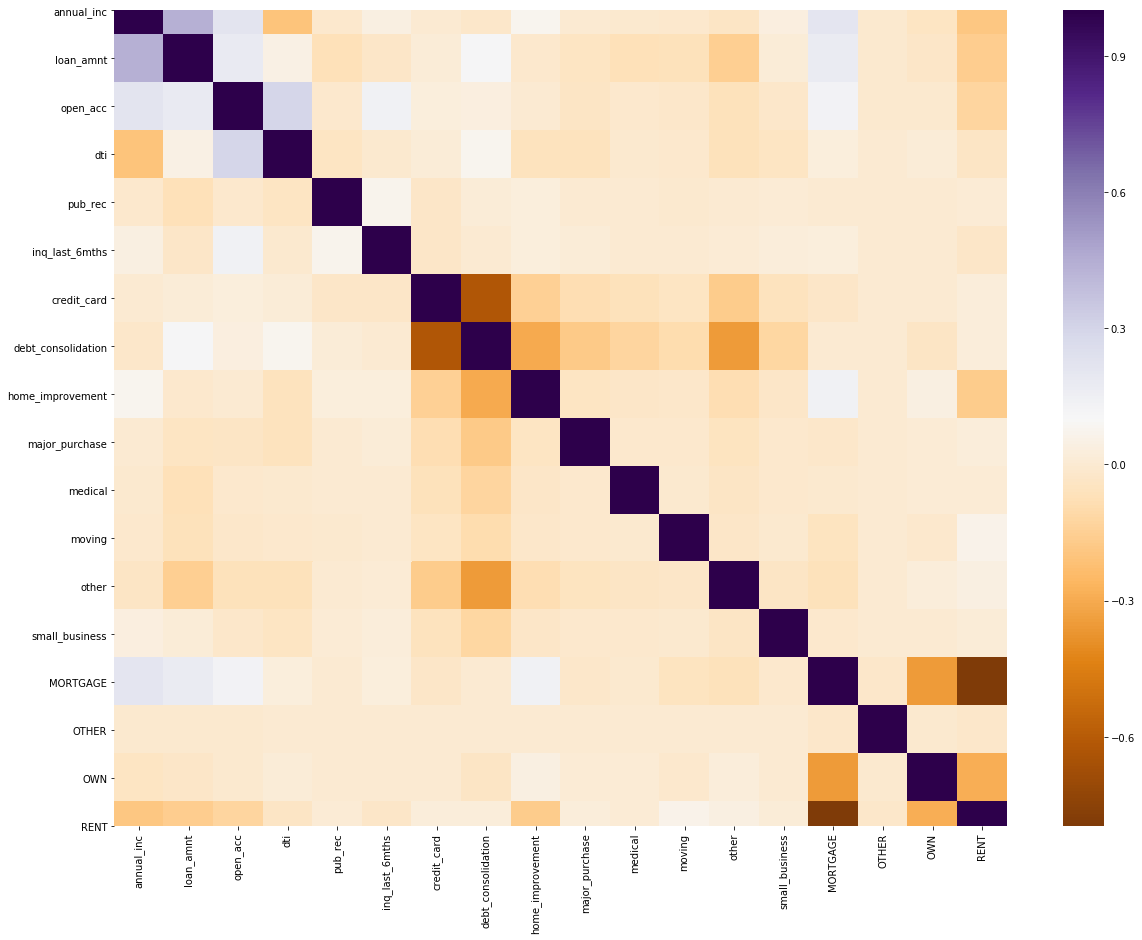

In [17]:
#See: https://python-graph-gallery.com/90-heatmaps-with-various-input-format/
#Calculate correlation between each pair of variables
corr_matrix = loan_s.corr()

#Plot it
plt.subplots(figsize = (20,15))
sns.heatmap(corr_matrix, cmap = 'PuOr')

In [18]:
#Normalization



float_array = loan_s.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
loan_s = pd.DataFrame(scaled_array)


print(loan_s)

                0         1         2         3    4    5    6    7    8    9  \
0        0.108931  0.050633  0.150000  0.315410  0.2  0.2  0.0  1.0  0.0  0.0   
1        0.179015  0.746835  0.216667  0.451148  0.2  0.0  0.0  1.0  0.0  0.0   
2        0.117501  0.113924  0.133333  0.188689  0.0  0.0  0.0  1.0  0.0  0.0   
3        0.183020  0.088608  0.166667  0.290820  0.0  0.0  0.0  1.0  0.0  0.0   
4        0.113436  0.746835  0.200000  0.448361  0.0  0.0  0.0  1.0  0.0  0.0   
...           ...       ...       ...       ...  ...  ...  ...  ...  ...  ...   
2243341  0.114938  0.291139  0.200000  0.358689  0.0  0.0  0.0  1.0  0.0  0.0   
2243342  0.058871  0.291139  0.166667  0.332459  0.0  0.2  0.0  1.0  0.0  0.0   
2243343  0.126952  0.240506  0.100000  0.228852  0.0  0.0  0.0  1.0  0.0  0.0   
2243344  0.118943  0.291139  0.133333  0.521639  0.0  0.2  0.0  1.0  0.0  0.0   
2243345  0.118943  0.406329  0.216667  0.318033  0.0  0.2  1.0  0.0  0.0  0.0   

          10   11   12   13

In [19]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
loan_encoded=le.fit_transform(y)

In [20]:
#Added this cell to get shapes

print(loan.shape)
print(loan_s.shape)

(2260668, 145)
(2243346, 18)


In [21]:
#Split into training and test sets

#need to split data set between dependent and independent

#x_train, x_test, y_train, y_test = train_test_split(loan_s, y, test_size=0.3)
#print(x_train.shape, y_train.shape)
#print(x_test.shape, y_test.shape)


In [22]:
#Specify number of neighbors

#knn_3 = KNeighborsClassifier(n_neighbors = 3)
#knn_4 = KNeighborsClassifier(n_neighbors = 4)
#knn_5 = KNeighborsClassifier(n_neighbors = 5)
#knn_6 = KNeighborsClassifier(n_neighbors = 6)
#knn_7 = KNeighborsClassifier(n_neighbors = 7)
#knn_8 = KNeighborsClassifier(n_neighbors = 8)
#knn_9 = KNeighborsClassifier(n_neighbors = 9)
#knn_10 = KNeighborsClassifier(n_neighbors = 10)
#knn_15 = KNeighborsClassifier(n_neighbors = 15)
#knn_20 = KNeighborsClassifier(n_neighbors = 20)

In [23]:
#Train model with test set
#knn_3.fit(x_train, y_train)
#knn_4.fit(x_train, y_train)
#knn_5.fit(x_train, y_train)
#knn_6.fit(x_train, y_train)
#knn_7.fit(x_train, y_train)
#knn_8.fit(x_train, y_train)
#knn_9.fit(x_train, y_train)
#knn_10.fit(x_train, y_train)
#knn_15.fit(x_train, y_train)
#knn_20.fit(x_train, y_train)

In [24]:
#Predict output with test set
#y_pred_3 = knn_3.predict(x_test)
#y_pred_4 = knn_4.predict(x_test)
#y_pred_5 = knn_5.predict(x_test)
#y_pred_6 = knn_6.predict(x_test)
#y_pred_7 = knn_7.predict(x_test)
#y_pred_8 = knn_8.predict(x_test)
#y_pred_9 = knn_9.predict(x_test)
#y_pred_10 = knn_10.predict(x_test)
#y_pred_15 = knn_15.predict(x_test)
#y_pred_20 = knn_20.predict(x_test)

In [25]:
#Model Accuracy
#from sklearn import metrics
#Accuracy_3 = metrics.accuracy_score(y_test, y_pred_3)
#Accuracy_4 = metrics.accuracy_score(y_test, y_pred_4)
#Accuracy_5 = metrics.accuracy_score(y_test, y_pred_5)
#Accuracy_6 = metrics.accuracy_score(y_test, y_pred_6)
#Accuracy_7 = metrics.accuracy_score(y_test, y_pred_7)
#Accuracy_8 = metrics.accuracy_score(y_test, y_pred_8)
#Accuracy_9 = metrics.accuracy_score(y_test, y_pred_9)
#Accuracy_10 = metrics.accuracy_score(y_test, y_pred_10)
#Accuracy_15 = metrics.accuracy_score(y_test, y_pred_15)
#Accuracy_20 = metrics.accuracy_score(y_test, y_pred_20)

#print("Accuracy_3:",Accuracy_3)
#print("Accuracy_4:",Accuracy_4)
#print("Accuracy_5:",Accuracy_5)
#print("Accuracy_6:",Accuracy_6)
#print("Accuracy_7:",Accuracy_7)
#print("Accuracy_8:",Accuracy_8)
#print("Accuracy_9:",Accuracy_9)
#print("Accuracy_10:",Accuracy_10)
#print("Accuracy_15:",Accuracy_15)
#print("Accuracy_20:",Accuracy_20)

In [26]:
#Plotting Accuracy
#plt.ylabel('Accuracy')
#plt.xlabel('K')
#plt.plot([3, 4, 5, 6, 7, 8, 9, 10, 15, 20], [Accuracy_3, Accuracy_4, Accuracy_5, Accuracy_6, Accuracy_7, Accuracy_8, Accuracy_9, Accuracy_10, Accuracy_15, Accuracy_20])
#plt.ylim(.20, .35)
#plt.savefig('K6.png')